## Injestion
This notebook carries out the following steps

Ingest data downloaded from the LendingClub website

In [3]:
import pandas as pd
import os
from sys import platform
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import seaborn as sns
import dtale
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Read Dataset

In [26]:
accepted_loans = pd.read_csv("accepted_2007_to_2018Q4.csv.gz", compression="gzip")

/var/folders/6_/pv__40bn4_375n00qt4w9fmcs_vd98/T/ipykernel_7728/2429265710.py:1: DtypeWarning:

Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.



In [27]:
accepted_loans.shape

(2260701, 151)

In [24]:
description = pd.read_excel('Data_Dictionary.xlsx').dropna()
description.style.set_properties(subset=['Description'], **{'width' :'850px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [3]:
rejected_loans = pd.read_csv("rejected_2007_to_2018Q4.csv.gz", compression="gzip")


In [5]:
lending_club_dataset_accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
lending_club_dataset_accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

## Basic Cleaning

### Dtypes

In [103]:
accepted_loans.dtypes

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

In [104]:
columns = accepted_loans.columns

In [106]:
accepted_loans[columns].memory_usage(deep=True)

Index                                          18085344
id                                             83286427
member_id                                      18085344
loan_amnt                                      18085344
funded_amnt                                    18085344
funded_amnt_inv                                18085344
term                                          151464756
int_rate                                       18085344
installment                                    18085344
grade                                         131118744
sub_grade                                     133379412
emp_title                                     157346609
emp_length                                    141519323
home_ownership                                142092677
annual_inc                                     18085344
verification_status                           156126261
issue_d                                        18085344
loan_status                                   14

In [109]:
accepted_loans.select_dtypes(float).describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [113]:
(accepted_loans
 [columns]
 .select_dtypes(object)
)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,Aug-2003,w,Jan-2019,NaN,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,Dec-1999,w,Jun-2016,NaN,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,Aug-2000,w,Jun-2017,NaN,Mar-2019,Joint App,Not Verified,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
3,66310712,60 months,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,Sep-2008,w,Feb-2019,Apr-2019,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
4,68476807,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,Jun-1998,w,Jul-2016,NaN,Mar-2018,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,60 months,C,C1,Unit Operator,7 years,MORTGAGE,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,356xx,AL,Dec-1999,f,Mar-2019,Apr-2019,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2260695,88977788,60 months,B,B3,Database Administrator,10+ years,MORTGAGE,Not Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,840xx,UT,Feb-1991,f,Mar-2019,Apr-2019,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2260696,88985880,60 months,B,B3,Vice President,9 years,MORTGAGE,Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,Feb-1995,f,Mar-2019,Apr-2019,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2260697,88224441,60 months,C,C4,Program Manager,6 years,RENT,Not Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,Jul-1999,f,Oct-2017,NaN,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019


### Analyse Null values

In [6]:
percent_missing = accepted_loans.isnull().mean() * 100
missing_value_df = pd.DataFrame({'column_name': accepted_loans.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.tail(20)

,column_name,percent_missing
settlement_amount,settlement_amount,98.485160
settlement_date,settlement_date,98.485160
settlement_status,settlement_status,98.485160
debt_settlement_flag_date,debt_settlement_flag_date,98.485160
settlement_percentage,settlement_percentage,98.485160
hardship_last_payment_amount,hardship_last_payment_amount,99.517097
hardship_payoff_balance_amount,hardship_payoff_balance_amount,99.517097
hardship_type,hardship_type,99.517097
hardship_length,hardship_length,99.517097
payment_plan_start_date,payment_plan_start_date,99.517097


In [22]:
missing_data = pd.DataFrame({'total_missing': accepted_loans.isnull().sum(), 
                             '%_missing': accepted_loans.isnull().sum()/len(accepted_loans)*100})
missing_data

,total_missing,%_missing
id,0,0.000000
loan_amnt,33,0.001460
funded_amnt,33,0.001460
funded_amnt_inv,33,0.001460
term,33,0.001460
int_rate,33,0.001460
installment,33,0.001460
grade,33,0.001460
sub_grade,33,0.001460
emp_title,167002,7.387178


### Column removal
Remove columns which are missing more than 80% of data

In [7]:
limitPer = len(accepted_loans) * .80
accepted_loans = accepted_loans.dropna(thresh=limitPer, axis=1)

In [126]:
percent_missing = accepted_loans.isnull().mean() * 100
missing_value_df = pd.DataFrame({'column_name': accepted_loans.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(20)

,column_name,percent_missing
id,id,0.0
revol_bal,revol_bal,0.0
initial_list_status,initial_list_status,0.0
out_prncp,out_prncp,0.0
out_prncp_inv,out_prncp_inv,0.0
total_pymnt,total_pymnt,0.0
total_pymnt_inv,total_pymnt_inv,0.0
total_rec_prncp,total_rec_prncp,0.0
total_rec_int,total_rec_int,0.0
fico_range_high,fico_range_high,0.0


### Cleaning up Correlated values

Identify Numerical columns


In [8]:
float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'fico_range_high', 'fico_range_low', 'total_pymnt', 'recoveries']

In [9]:
column_correlation = accepted_loans[float_cols].corr()

<AxesSubplot: >

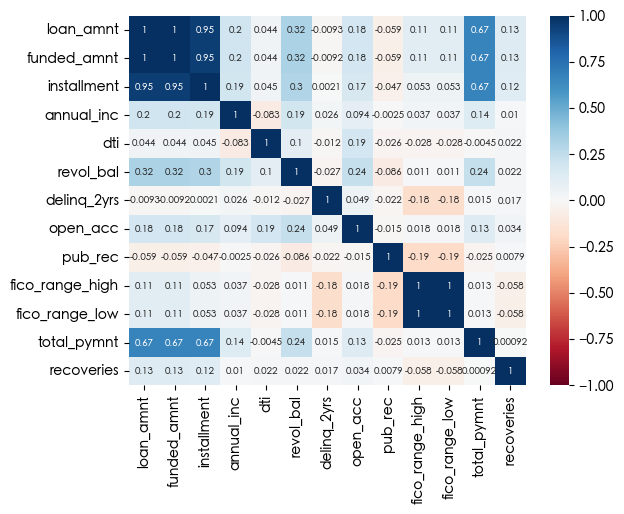

In [16]:
sns.heatmap(column_correlation, cmap='RdBu', vmin=-1, vmax=1, annot=True,
            annot_kws={'fontsize':7, 'fontweight':'bold'})

In [129]:
float_cols = list(accepted_loans.select_dtypes(float).columns)

In [130]:
column_correlation_with_target = accepted_loans[float_cols].corrwith(accepted_loans.target)

In [142]:
column_correlation_with_target = pd.DataFrame({'feature':column_correlation_with_target.index, 
                                               'corr_value':column_correlation_with_target.values})

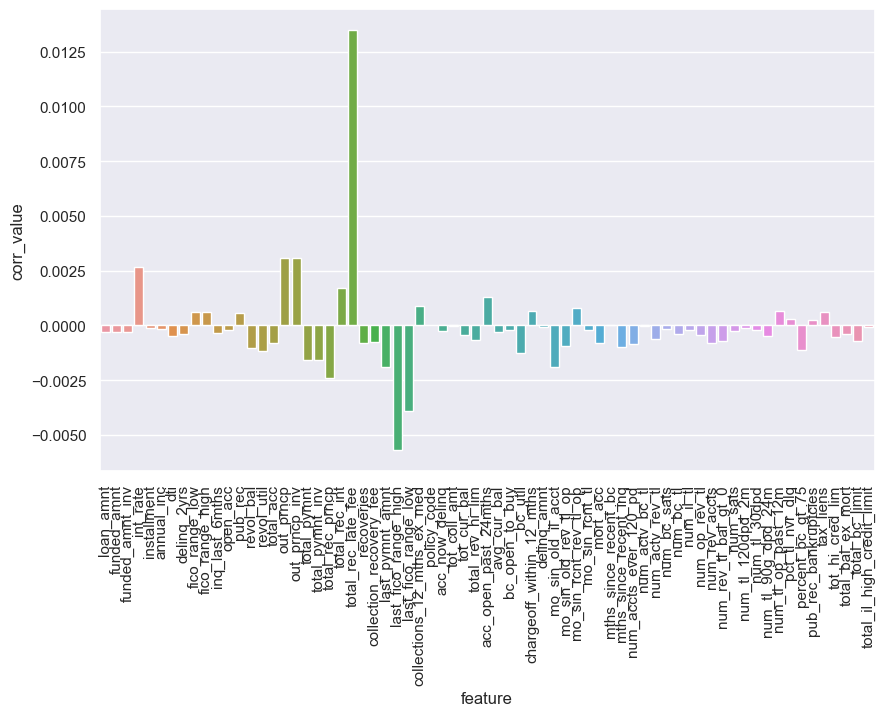

In [144]:
sns.barplot(x='feature', y='corr_value', data=column_correlation_with_target)
plt.xticks(rotation=90)
plt.show()

### Cleaning up Categorials variables with high cardinality

### Cleaning up leaky attributes
Requires a bit of domain knowledge and statistical knowledge

## EDA

### **Define Target Column**

In [96]:
accepted_loans.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [1]:
target = [1 if i in ['Default', 'Charged Off'] else 0 for i in accepted_loans['loan_status']]
accepted_loans['target'] = target
accepted_loans['target'].value_counts()

NameError: name 'accepted_loans' is not defined

### **Self Service EDA Tools**

many tools exist out there. 
1. Pandas Profilier
2. Dtale
3. AWS Databrew

### EDA Questions

#### Questions

1. Loan Absolute Variables Distribution: How does loan value, amount funded by lender and total committed by investors distribution looks like?
2. Applications Volume: How many loan applications were received?
3. Defaults Volume: How many loans were defaulted?
4. Average Interest Rates: What was the average interest rate?
5. Loan Purpose: What were the most frequent Loan Purposes?
6. Loan Grades: How worthy are the loans?
7. Delinquency Breakdown: How many loans were Charged Off?
8. What dimensions of a rejected loan are most highly correlated?Do applications with lengthier work histories have higher or lower debt-to-income ratios? Are people of a higher risk category more or less likely to apply for larger loans?
9. What dimensions of an accepted loan are most highly correlated? What is the relationship between loan amounts and interest rates? Are those with lengthier work histories more likely to be approved for a larger loan?
10. Are the relationships between these dimensions consistent between accepted and rejected loans? Are there any immediate correlational factors that might seem to separate the rejected applicant from the approved applicant ?



In [28]:
dtale.show(accepted_loans)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dtale/views.py:725: FutureWarning:

['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Executing shutdown due to inactivity...


2022-10-27 15:35:04,219 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-10-27 15:35:04,308 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_server()
  File "/Library/Frameworks/Python.framework/Versions/3.10

2022-10-27 15:35:04,310 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/flask/app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dtale/app.py", line 435, in shutdown
    shutdown_server()
  File "/Library/Fram

#### Loan Absolute Variables Distribution

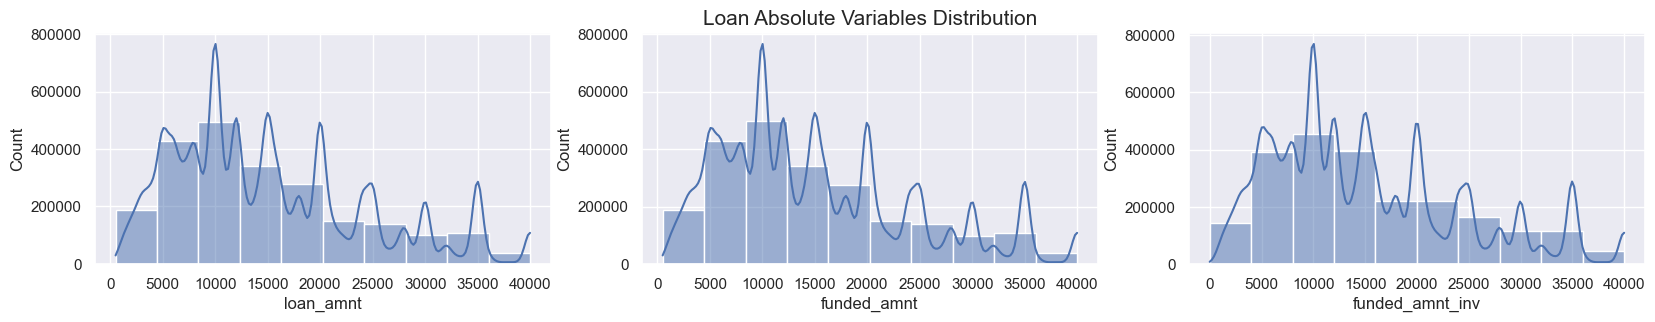

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dtale/views.py:1929: FutureWarning:

The default value of regex will change from True to False in a future version.



In [49]:
fig, axs = plt.subplots(ncols=3)
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(20,3)})
sns.histplot(x='loan_amnt', data=lending_club_dataset_accepted, palette='flare', bins=10, kde=True, ax=axs[0])
sns.histplot(x='funded_amnt', data=lending_club_dataset_accepted, palette='inferno', bins=10, kde=True, ax=axs[1])
sns.histplot(x='funded_amnt_inv', data=lending_club_dataset_accepted, palette='inferno', bins=10, kde=True, ax=axs[2])
axs[1].set_title("Loan Absolute Variables Distribution", fontsize=15)
plt.show()


#### Application Volume

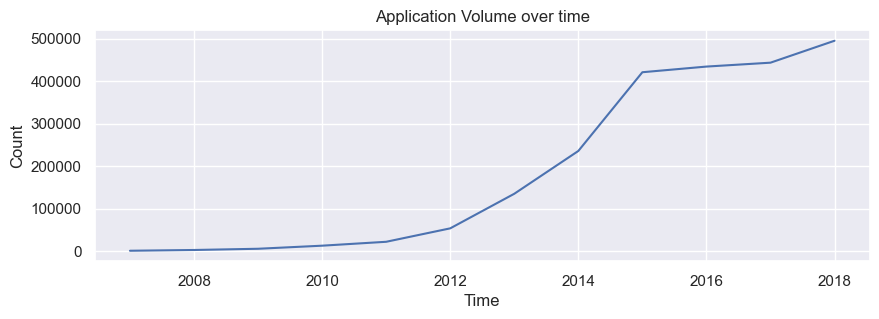

In [55]:
accepted_loans.issue_d = pd.to_datetime(accepted_loans.issue_d)

# Filter date is not null
accepted_loans = accepted_loans[accepted_loans.issue_d.notnull()]

# Group By date
grp_by_year_loans = accepted_loans.groupby([accepted_loans['issue_d'].dt.year])['id'].count()
grp_by_year_loans = grp_by_year_loans.reset_index(name='count')
grp_by_year_loans

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,3)})
sns.lineplot(x='issue_d', y='count', data=grp_by_year_loans, palette='flare')
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Application Volume over time")
plt.show()

#### Interest Rate

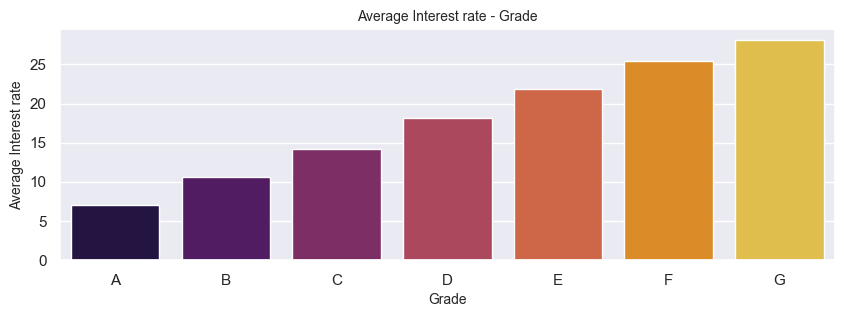

In [140]:
int_rates = accepted_loans.groupby("grade").int_rate.mean().reset_index()
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(x='grade', y='int_rate', data=int_rates, palette='inferno')
plt.title("Average Interest rate - Grade", fontsize=10)
plt.xlabel("Grade", fontsize=10)
plt.ylabel("Average Interest rate", fontsize=10);

#### Loan Purpose

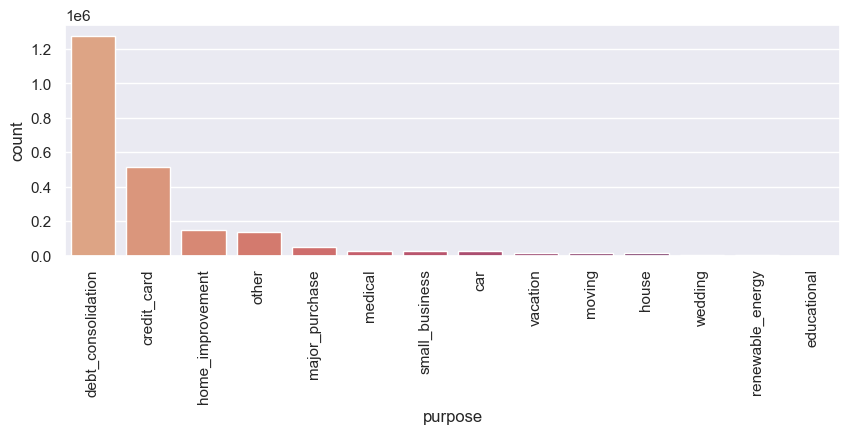

In [159]:
loan_purpose_grp = accepted_loans.groupby("purpose")['id'].count().reset_index(name='count')
loan_purpose_grp.sort_values('count', inplace=True, ascending=False)

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(x='purpose', y='count', data=loan_purpose_grp, palette='flare')
plt.xticks(rotation=90)
plt.show()

#### Loan Grades

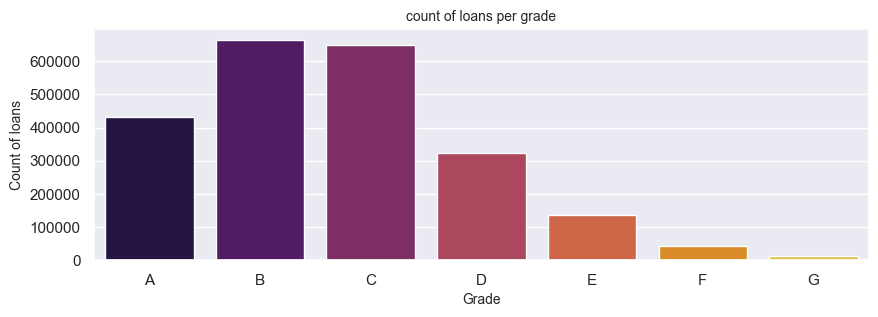

In [25]:
loan_grades = accepted_loans.groupby("grade")['id'].count().reset_index(name='count')

sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(x='grade', y='count', data=loan_grades, palette='inferno')
plt.title("count of loans per grade", fontsize=10)
plt.xlabel("Grade", fontsize=10)
plt.ylabel("Count of loans", fontsize=10);

#### Employment Length

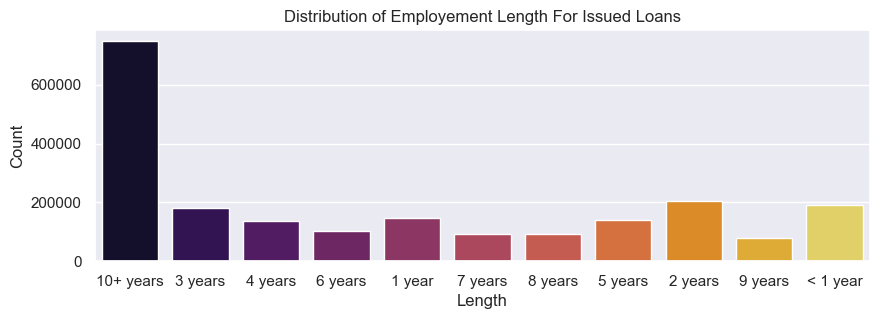

In [27]:
sns.set(rc={'figure.figsize':(10,3)})
sns.countplot(accepted_loans['emp_length'], palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

#### Loan grades

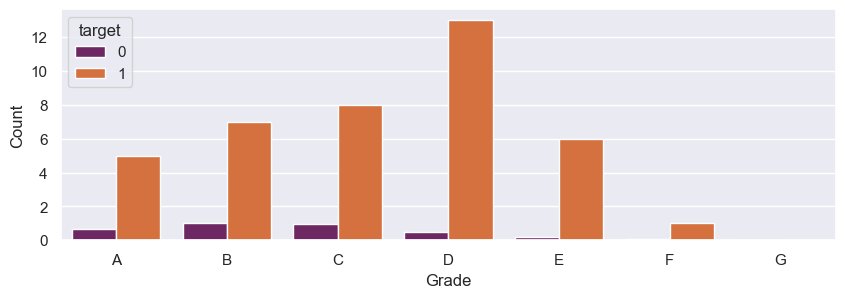

In [93]:
loan_grades = accepted_loans.groupby(['grade', 'target'])['id'].count().reset_index()
loan_grades.loc[loan_grades.target == 0, 'id'] = (loan_grades.loc[loan_grades.target == 0, 'id'] - loan_grades.loc[loan_grades.target == 0, 'id'].min()) / (loan_grades.loc[loan_grades.target == 0, 'id'].max() - loan_grades.loc[loan_grades.target == 0, 'id'].min())    


sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(x='grade', y='id', data=loan_grades, palette='inferno', hue ='target')
plt.ylabel("Count")
plt.xlabel("Grade")
plt.show()

#### Interest Rate vs Grade

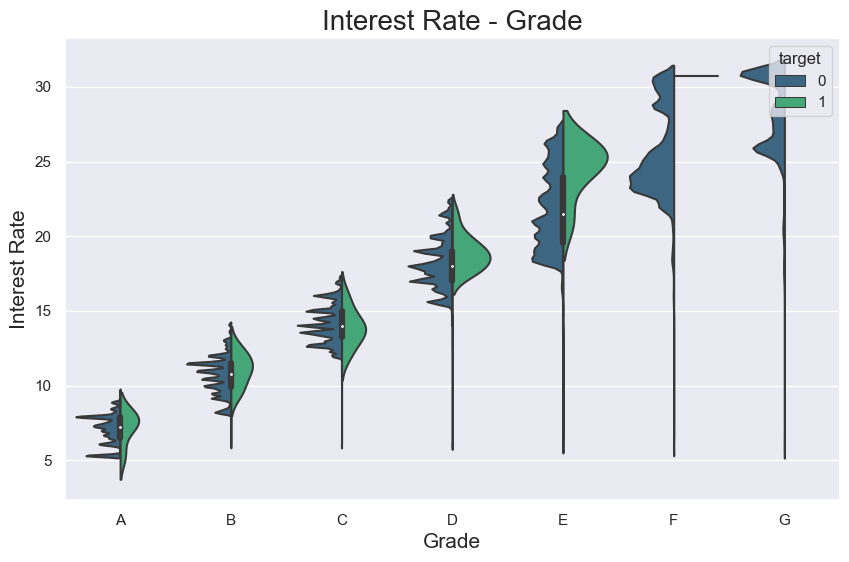

In [96]:
sns.set(rc={'figure.figsize':(10,6)})
sns.violinplot(x="grade", y="int_rate", data=accepted_loans, palette='viridis', order="ABCDEFG",hue='target',split=True)
plt.title("Interest Rate - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

#### Payment Plan

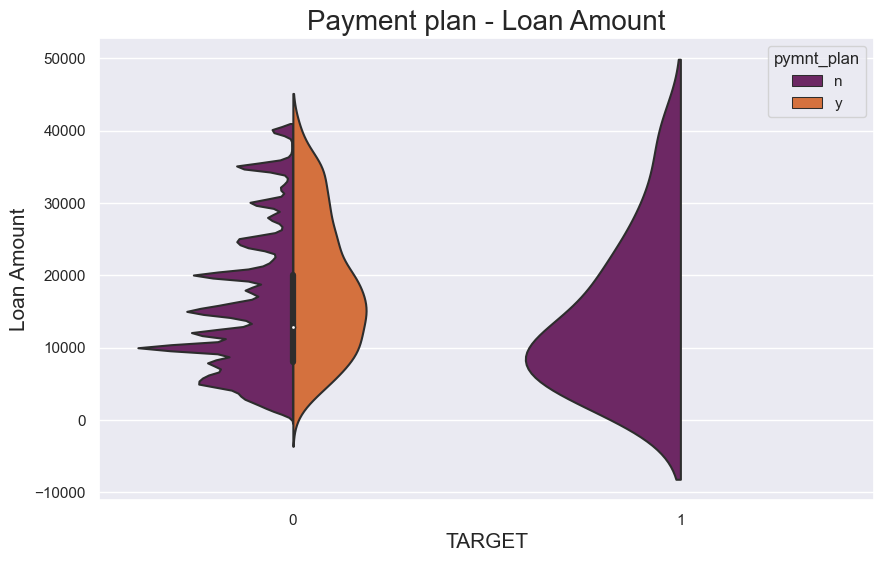

In [99]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.violinplot(x="target",y="loan_amnt",data=accepted_loans, hue="pymnt_plan", split=True,palette='inferno')
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

### Column List

In [1]:
# Identify the columns we'll be keeping from the dataset
cols_to_pick = ['id','loan_amnt','funded_amnt','term','int_rate',
                 'installment','grade','emp_length', 'home_ownership',
                 'annual_inc','verification_status','issue_d',
                 'loan_status','purpose','dti', 'delinq_2yrs',
                 'earliest_cr_line','open_acc','pub_rec', 'fico_range_high',
                 'fico_range_low', 'revol_bal','revol_util', 'total_pymnt',
                                                    'last_pymnt_d', 'recoveries']

# Identify the type of each of these column
float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'fico_range_high', 'fico_range_low', 'total_pymnt', 'recoveries']
cat_cols = ['term', 'grade', 'emp_length', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose']
perc_cols = ['int_rate', 'revol_util']
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']

# Ensure that we have types for every column
assert set(cols_to_pick) - set(float_cols) - set(cat_cols) - set(perc_cols) - set(date_cols) == set(["id"])

In [23]:
accepted_loans[cols_to_pick].to_csv('accepted_loans_cleaned.csv')

In [2]:
accepted_loans.head()

NameError: name 'accepted_loans' is not defined